In [1]:
import motor_proteins as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import csv
import glob
from scipy.ndimage import gaussian_filter1d
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider, Layout, interactive
from scipy.optimize import minimize


k401

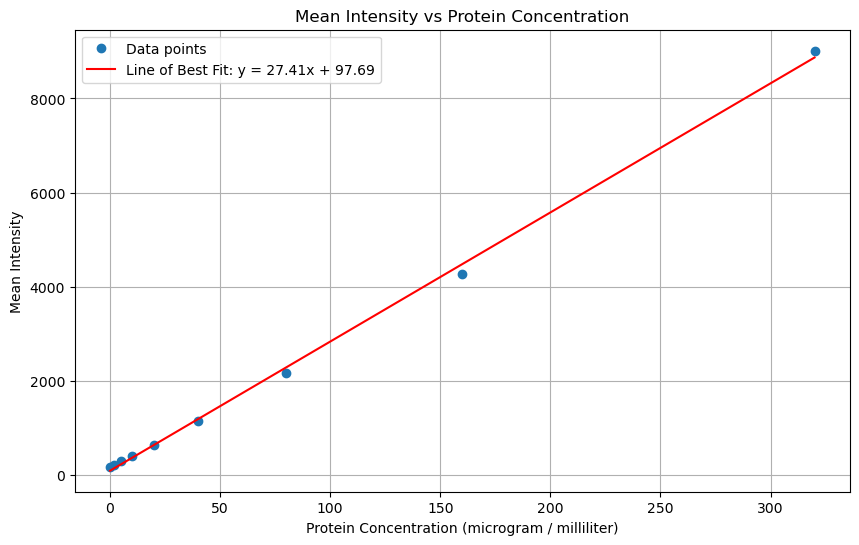

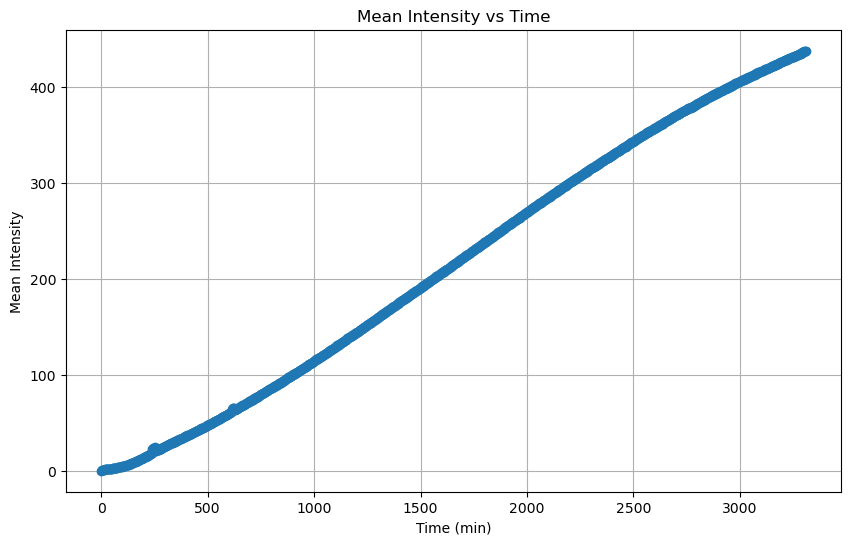

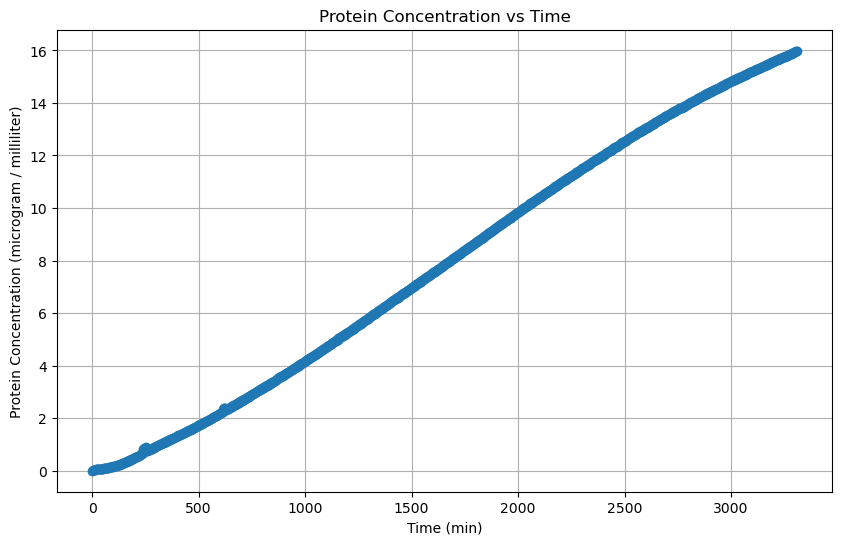

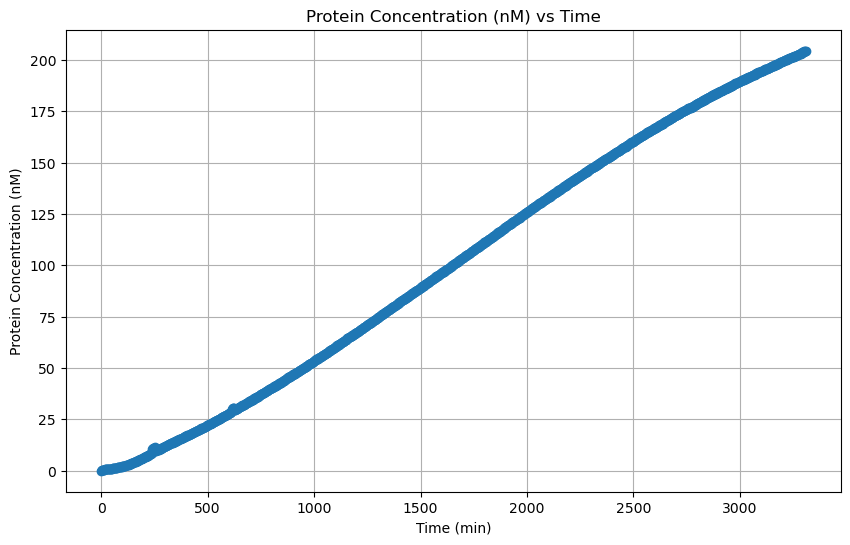

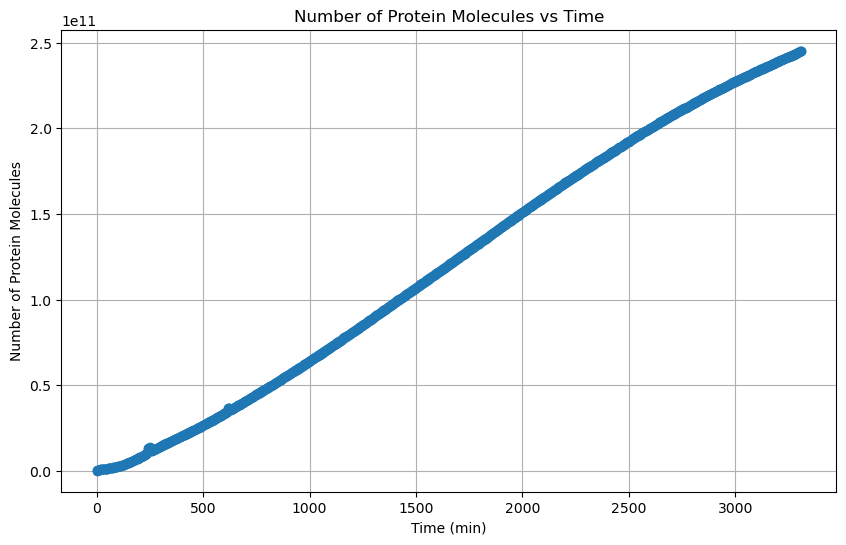

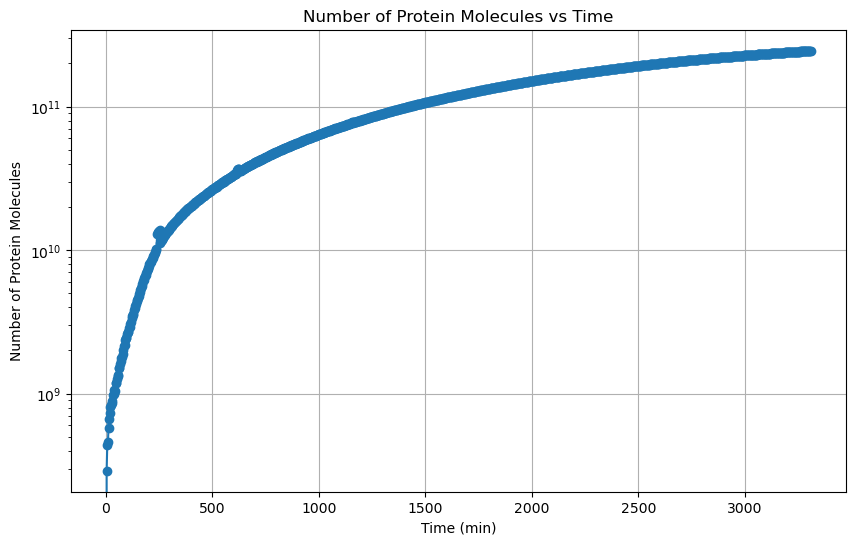

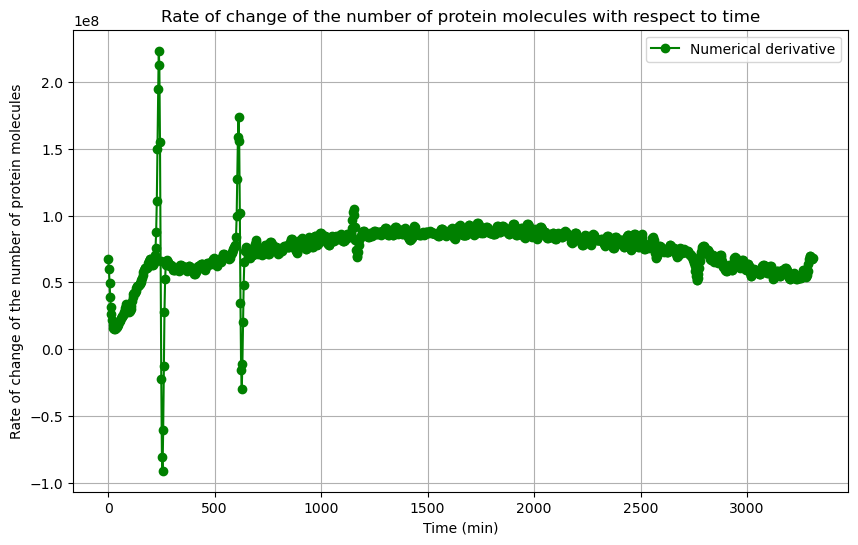

Optimized parameters:
k_TL: 9.979499579143322
k_TX: 0.23981885558343663
R_p: 30.012279378095684
tau_m: 718.0525041804935
K_TL: 5.001504771590312
R: 79.9736329942682
k_deg: 0.0
X_p: 0.4526164798807031
K_p: 3.95271010483593
tau_0: 0.0002475562954105115
tau_f: 298.7516978291736


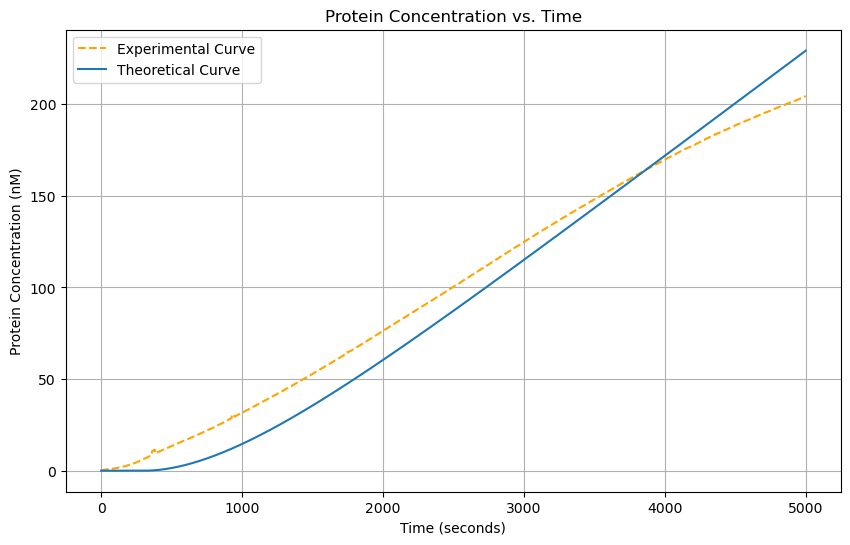

interactive(children=(FloatSlider(value=9.979499579143322, description='k_TL (amino acids/s)', layout=Layout(w…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.1431014342367D+04   r2 =  0.6059717809001D-05
The optimized parameters could not be found using the following random initial guesses:   


[11.603236329294365, 0.8262226127041566, 30.146256047642883, 784.5372296244325, 5.03229379445912, 82.01522036234307, 0.010542180942525207, 1.0293613679367515, 4.520088147687184, 0.0, 300.0980940882768]
32


/Applications/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=9.956780610202712, description='k_TL (amino acids/s)', layout=Layout(w…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=11.680125523372922, description='k_TL (amino acids/s)', layout=Layout(…

In [2]:
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/k401-activedrops/img_*********_gfp-4x_000.tif")) # The paths must be sorted
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif")) # These paths must also be sorted

# Provide your specific values for N_p, N_m, D, and initial guesses - Known data
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters -- Reasonable guesses
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # Protein production rate (molecules/s)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (units)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0     # Initial time delay (s)
tau_f = 300    # Final time delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Time interval should be given in minutes, volume of the droplet should be given in microliters, molecular weight should be given in kDa
mp.runFullAnalysis(paths, calibration_curve_paths, 3, 2, 78.2, N_p, N_m, D, initial_guesses, "experimentalData_k401.csv", "optimizedParameters_k401.csv")

kif3

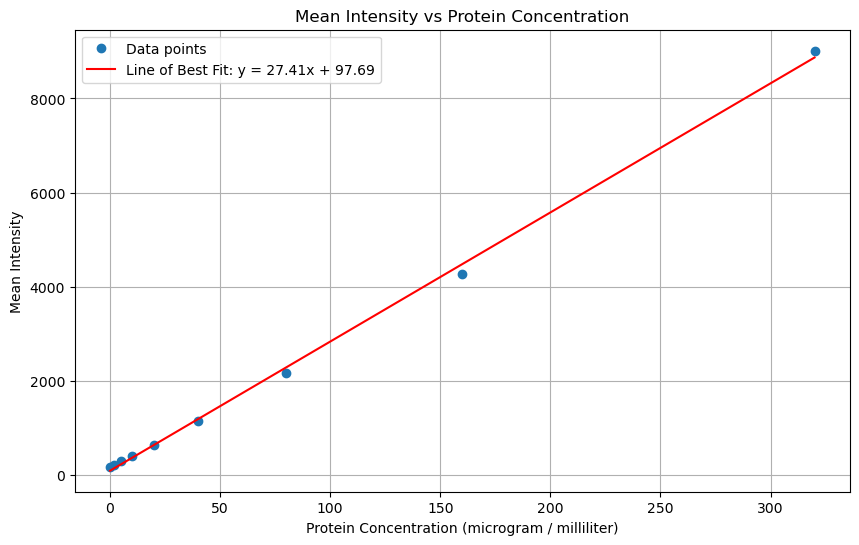

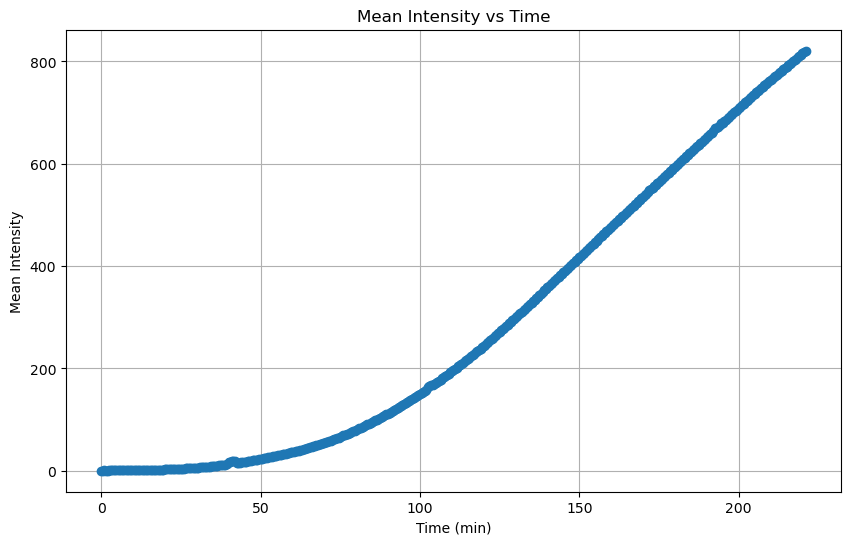

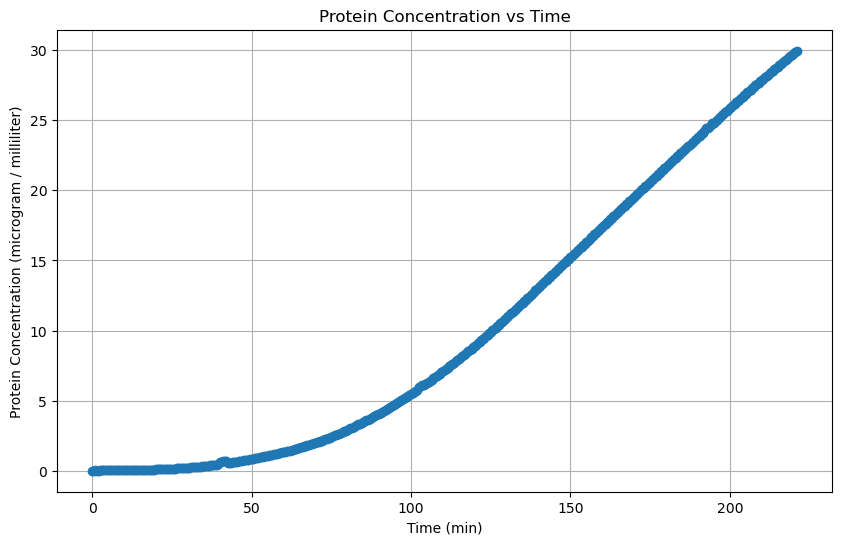

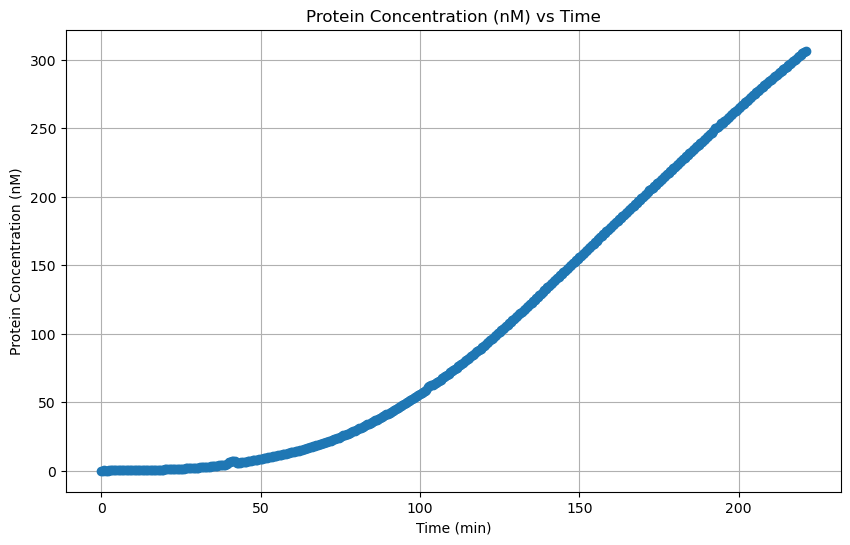

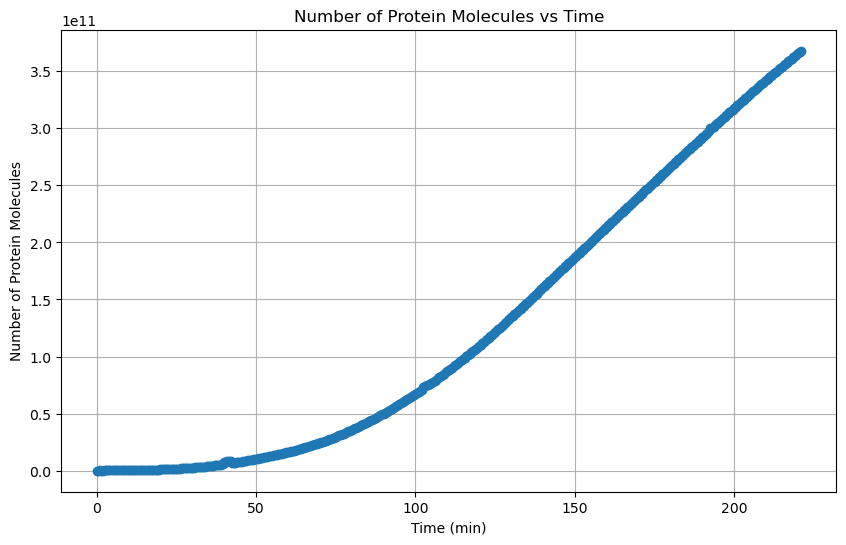

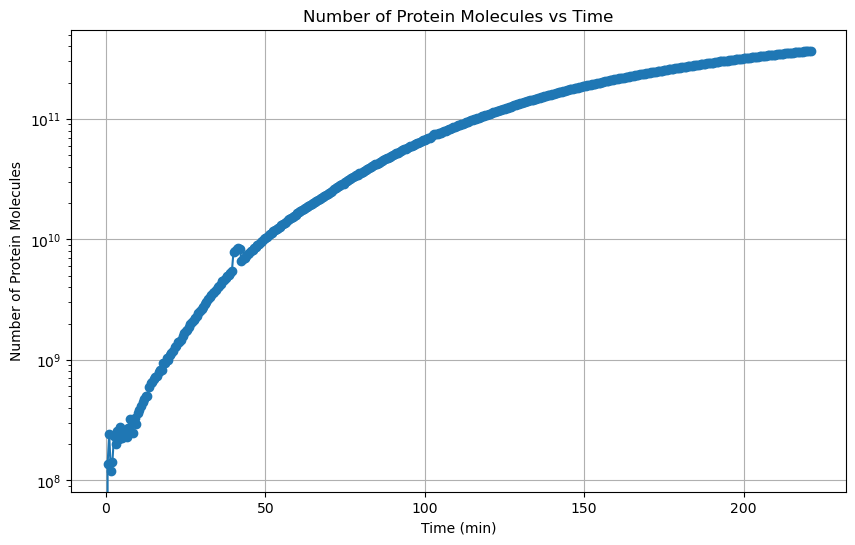

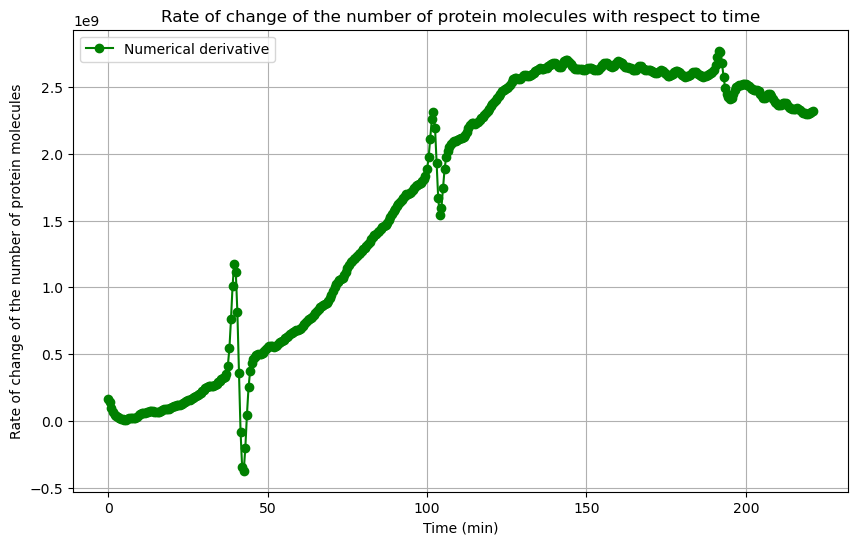

Optimized parameters:
k_TL: 10.159710602699661
k_TX: 1.922035098380654
R_p: 31.085389417788093
tau_m: 733.8366248532163
K_TL: 4.675318939955801
R: 80.91366930025833
k_deg: 0.13769119726961776
X_p: 1.16070533912756
K_p: 1e-06
tau_0: 0.018825598425464385
tau_f: 325.1285606454355


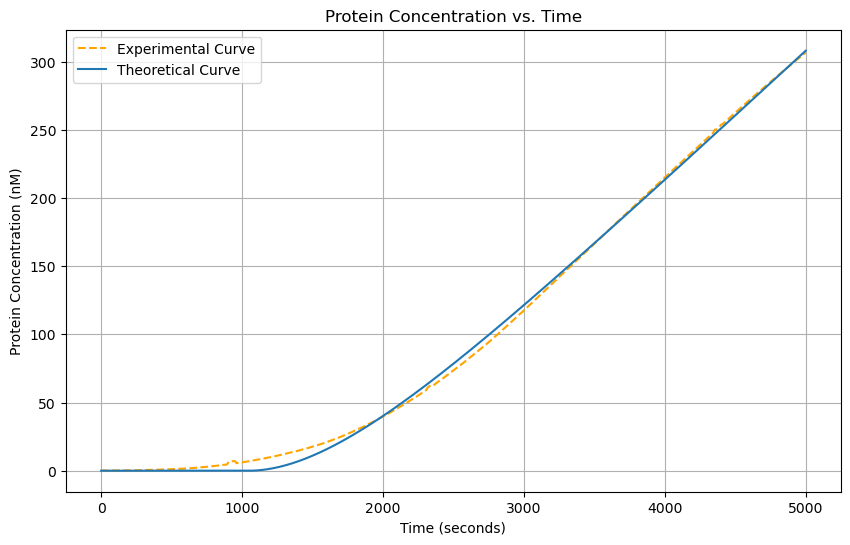

interactive(children=(FloatSlider(value=10.159710602699661, description='k_TL (amino acids/s)', layout=Layout(…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=11.579025006864526, description='k_TL (amino acids/s)', layout=Layout(…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=10.68981871719135, description='k_TL (amino acids/s)', layout=Layout(w…

In [3]:
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/kif3-activedrops/img_*********_gfp-4x_000.tif"))
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif"))

# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# wrapper function to run the full analysis
# Time interval should be given in minutes, volume of the droplet should be given in microliters, molecular weight should be given in kDa
pa.runFullAnalysis(paths, calibration_curve_paths, 0.5, 2, 97.7, N_p, N_m, D, initial_guesses, "experimentalData_kif3.csv", "optimizedParameters_kif3.csv")
 

Chimera A 

A,B,C,D are the same as k401

Optimized parameters:
k_TL: 9.82701408625168
k_TX: 0.8805385777706434
R_p: 29.728038406731486
tau_m: 719.582337696686
K_TL: 5.0714748856920195
R: 79.76645663610014
k_deg: 0.1878540459508713
X_p: 0.9999525197189314
K_p: 5.363246410227035
tau_0: 0.0
tau_f: 295.84233754589343


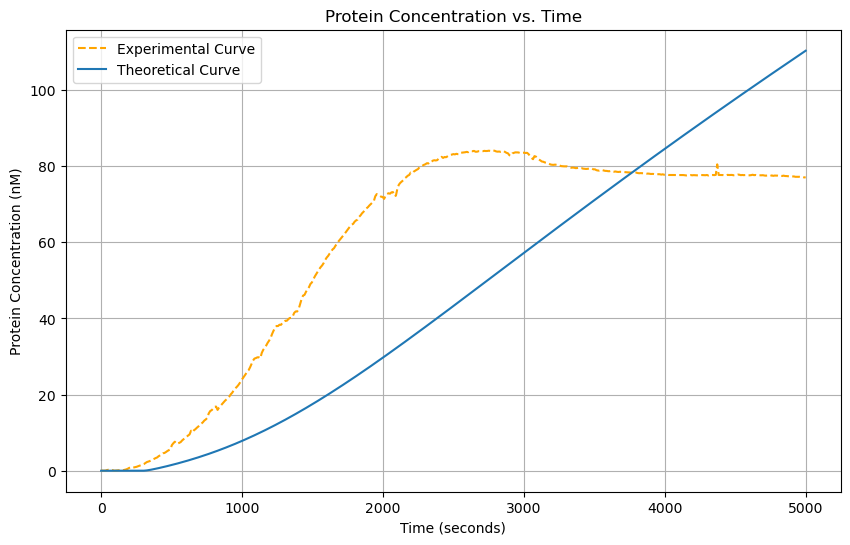

interactive(children=(FloatSlider(value=9.82701408625168, description='k_TL (amino acids/s)', layout=Layout(wi…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=13.31636122482405, description='k_TL (amino acids/s)', layout=Layout(w…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=10.73524633153412, description='k_TL (amino acids/s)', layout=Layout(w…

In [4]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_A.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_A.csv")

Chimera B

E,F,G,H are the same as kif3

Optimized parameters:
k_TL: 10.001098043780196
k_TX: 0.935897732650389
R_p: 30.01196065113629
tau_m: 716.2359909580157
K_TL: 4.947502901171809
R: 80.99448509773913
k_deg: 0.2444631768490666
X_p: 0.9848857950157424
K_p: 5.176568844309173
tau_0: 6.822946571283239e-06
tau_f: 244.50292249598704


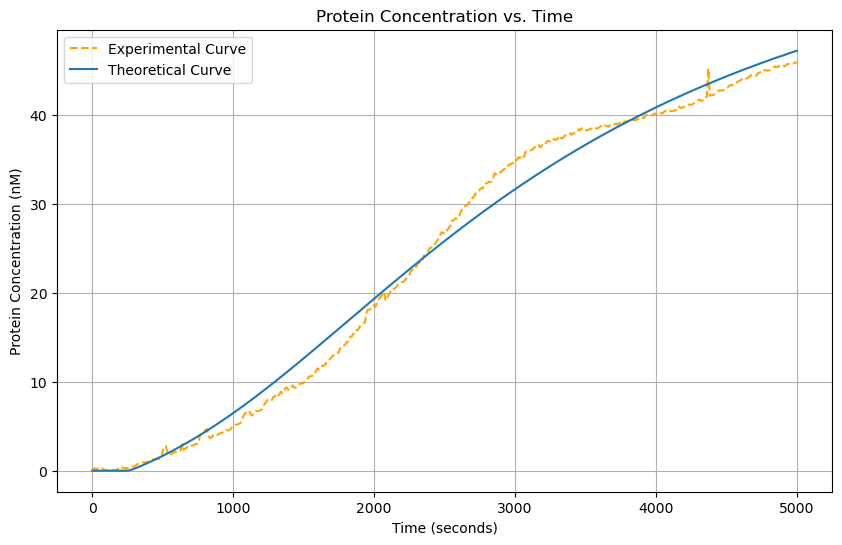

interactive(children=(FloatSlider(value=10.001098043780196, description='k_TL (amino acids/s)', layout=Layout(…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=11.974151386640344, description='k_TL (amino acids/s)', layout=Layout(…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=9.773688813024023, description='k_TL (amino acids/s)', layout=Layout(w…

In [5]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_B.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_B.csv")

Chimera C

Optimized parameters:
k_TL: 9.971934230988126
k_TX: 0.7629284874834354
R_p: 29.995677615202055
tau_m: 719.9997840938524
K_TL: 5.002008203174171
R: 79.99986105695308
k_deg: 0.6994373117392314
X_p: 2.092342185577337
K_p: 3.999887472912924
tau_0: 2.1513457681976433e-11
tau_f: 300.00008984260444


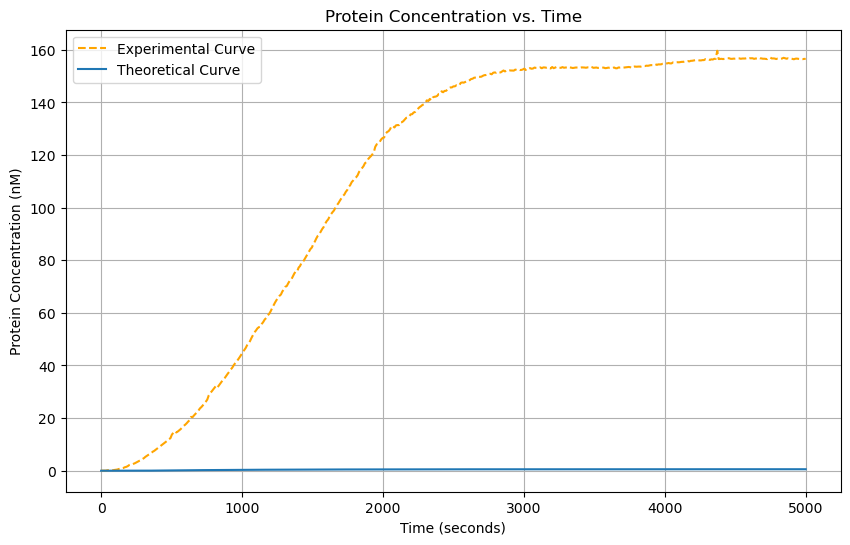

interactive(children=(FloatSlider(value=9.971934230988126, description='k_TL (amino acids/s)', layout=Layout(w…

0
1


/Applications/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.0000000000000D+00   r2 =  0.1907348632812D-04
The optimized parameters could not be found using the following random initial guesses:   


[11.548911358502142, 1.101745136544465, 28.839181663215154, 707.414478021639, 4.99836657770369, 83.36749162594154, 0.011281075054475237, 1.0578394366873383, 4.168397197155472, 0.0, 299.3393184679774]
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/Applications/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.5166596498014D+03   r2 =  0.2574174476224D-05
The optimized parameters could not be found using the following random initial guesses:   


[9.977865636575055, 1.1390700189446064, 26.22165061479998, 807.7007504348156, 5.07281751278608, 87.32551542668999, 0.010318058805788705, 0.6958424691363334, 4.779094144304556, 0.0, 306.9394511957493]
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=15.194591559747842, description='k_TL (amino acids/s)', layout=Layout(…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=9.915956337764712, description='k_TL (amino acids/s)', layout=Layout(w…

In [6]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_C.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_C.csv")

Chimera D

Optimized parameters:
k_TL: 10.031469357760876
k_TX: 1.204896264186921
R_p: 30.25969706440881
tau_m: 677.6167816514503
K_TL: 4.929454408637206
R: 81.86972016424397
k_deg: 0.271898727509587
X_p: 1.095802444132289
K_p: 6.316446154767036
tau_0: 0.0
tau_f: 210.20621453857257


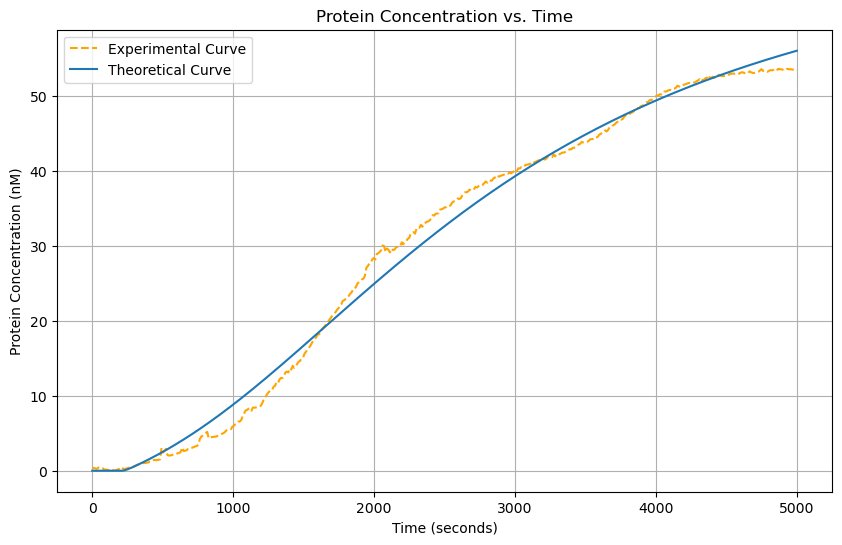

interactive(children=(FloatSlider(value=10.031469357760876, description='k_TL (amino acids/s)', layout=Layout(…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=10.058456594748286, description='k_TL (amino acids/s)', layout=Layout(…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=8.178374602172731, description='k_TL (amino acids/s)', layout=Layout(w…

In [7]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_D.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_D.csv")

Chimera E

Optimized parameters:
k_TL: 9.807366237698474
k_TX: 1.2353446525703191
R_p: 29.48568442640675
tau_m: 709.716027772334
K_TL: 6.902209905700246
R: 119.49284325766297
k_deg: 0.07651526727295277
X_p: 1.0588207161513878
K_p: 20.28357255153601
tau_0: 0.0
tau_f: 255.32730803600725


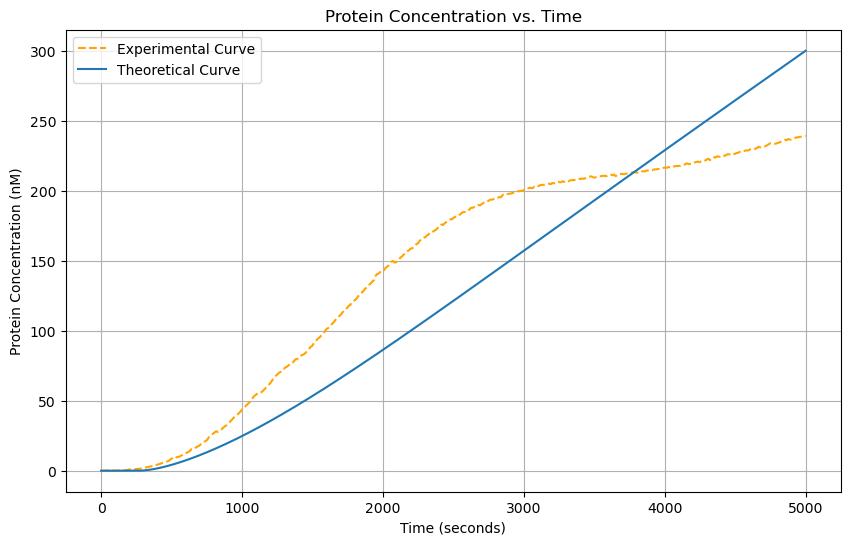

interactive(children=(FloatSlider(value=9.807366237698474, description='k_TL (amino acids/s)', layout=Layout(w…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=10.243285712555496, description='k_TL (amino acids/s)', layout=Layout(…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=9.8800853579817, description='k_TL (amino acids/s)', layout=Layout(wid…

In [8]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_E.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_E.csv")

Chimera F

Optimized parameters:
k_TL: 10.097317543229515
k_TX: 0.9962958890551619
R_p: 29.517710106886597
tau_m: 680.3055419558054
K_TL: 7.384939394038206
R: 102.56195312824565
k_deg: 0.10135618159944215
X_p: 1.07707923732832
K_p: 30.535681668797263
tau_0: 0.0
tau_f: 310.42465846464063


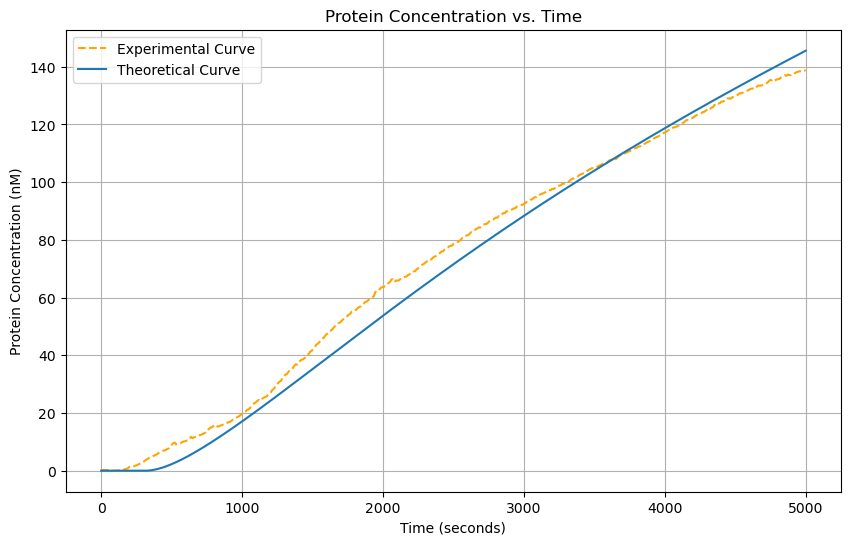

interactive(children=(FloatSlider(value=10.097317543229515, description='k_TL (amino acids/s)', layout=Layout(…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=10.919468638231995, description='k_TL (amino acids/s)', layout=Layout(…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=8.681777428342905, description='k_TL (amino acids/s)', layout=Layout(w…

In [9]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_F.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_F.csv")

Chimera G

Optimized parameters:
k_TL: 10.008352726654664
k_TX: 1.0692751976921286
R_p: 30.496685745286925
tau_m: 701.0515292012292
K_TL: 2.435142680176938
R: 108.24703026171767
k_deg: 0.1316892484995691
X_p: 1.3901767541160268
K_p: 21.595150072800312
tau_0: 4.695879241012335e-10
tau_f: 311.9803253757923


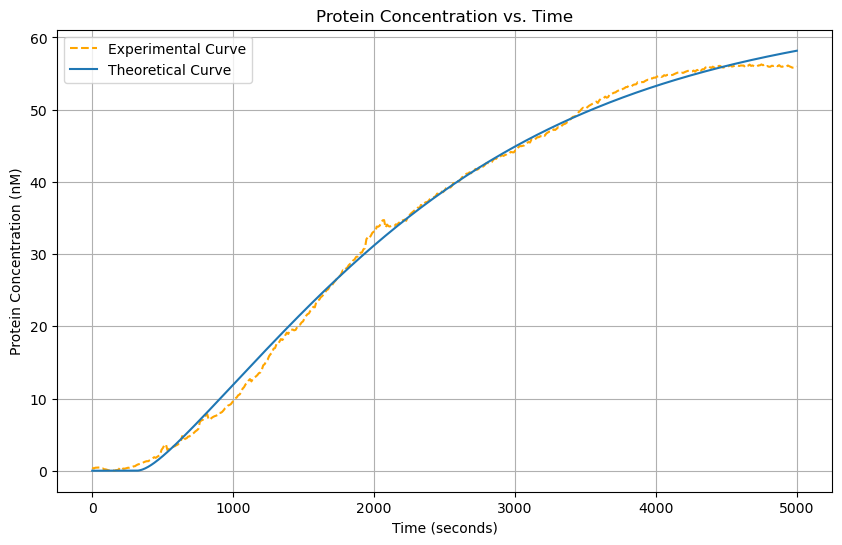

interactive(children=(FloatSlider(value=10.008352726654664, description='k_TL (amino acids/s)', layout=Layout(…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=8.681001315292349, description='k_TL (amino acids/s)', layout=Layout(w…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=10.286785367807552, description='k_TL (amino acids/s)', layout=Layout(…

In [10]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_G.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_G.csv")

Chimera H

Optimized parameters:
k_TL: 11.605956076324567
k_TX: 1.1656879553071349
R_p: 35.80036259097204
tau_m: 671.3377304190785
K_TL: 1.687239653542072
R: 99.78695750350141
k_deg: 0.22494646961794018
X_p: 1.364010216339608
K_p: 55.28011501346472
tau_0: 0.012997428718532156
tau_f: 299.6605673291233


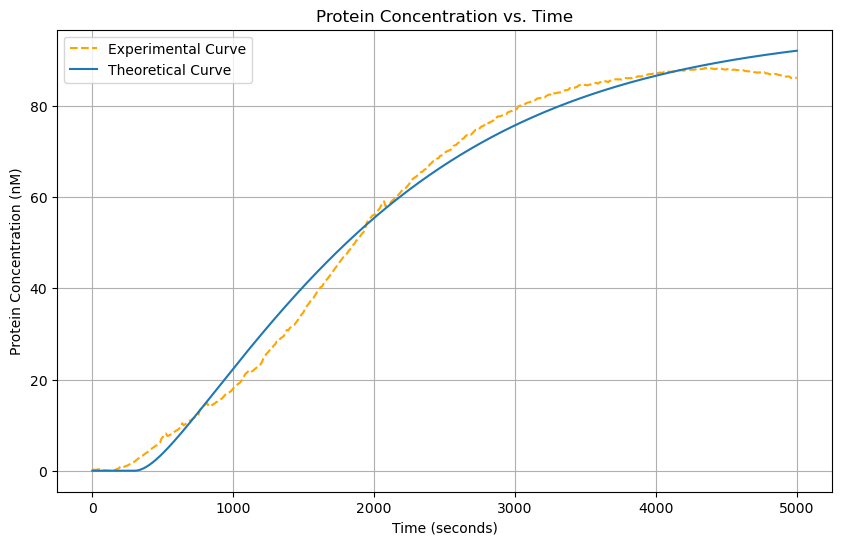

interactive(children=(FloatSlider(value=11.605956076324567, description='k_TL (amino acids/s)', layout=Layout(…

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


/Applications/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin     
      in above,  r1 =  0.1248827263752D+04   r2 =  0.1409851712567D-04
The optimized parameters could not be found using the following random initial guesses:   


[9.718703522623347, 1.1610202665681764, 24.1470353527447, 655.0062969410873, 5.828017062986756, 68.20150213871581, 0.010181290765685745, 0.868674004297521, 4.319053796757738, 0.0, 339.40892691243334]
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

This is the model with the least value of SSE (this is the best found model):


interactive(children=(FloatSlider(value=11.089928926257016, description='k_TL (amino acids/s)', layout=Layout(…


This is the model with the greatest value of SSE (this is the worst found model):


interactive(children=(FloatSlider(value=8.162261189875885, description='k_TL (amino acids/s)', layout=Layout(w…

In [11]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_H.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_H.csv")

1.- make sure the constrained optimization works for k401 and kif3 with the specified first guesses

2.- the code should generate protein concentration vs time plots for k401 and kif3 (overlapped -- all). Make sure time is in the same units in all plots (minutes)

3.- generate the experimental plot overlapped with the theoretical for each individual protein (k401 and kif3)

4.- everything should run upon the wrapper function

5.- generate the plot with sliders for each individual protein. Set inferred parameters as slider preset value.

6.- create a scatter plot where the x axis is the different parameters names, the y axis is the value, and the color is the protein name.

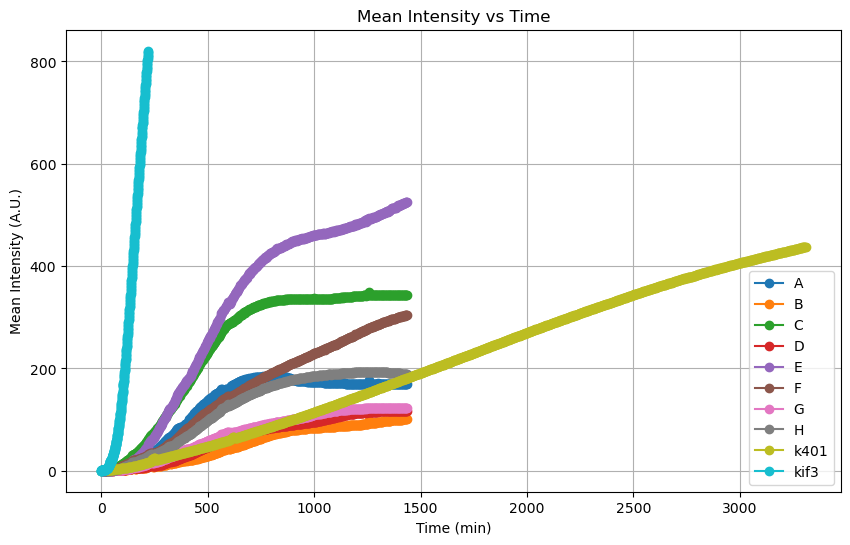

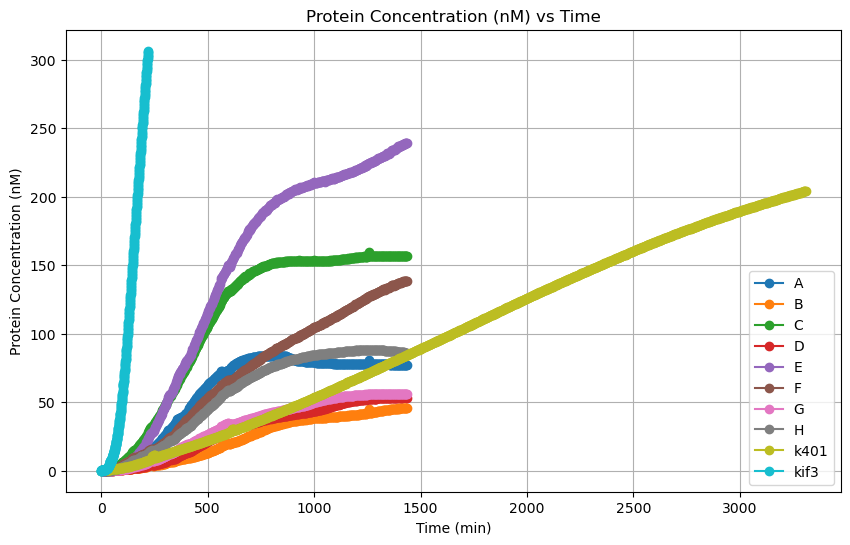

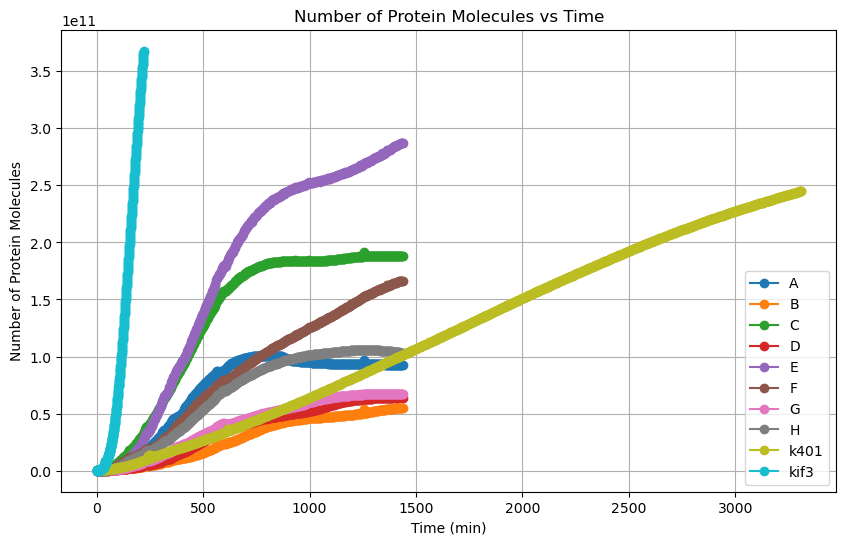

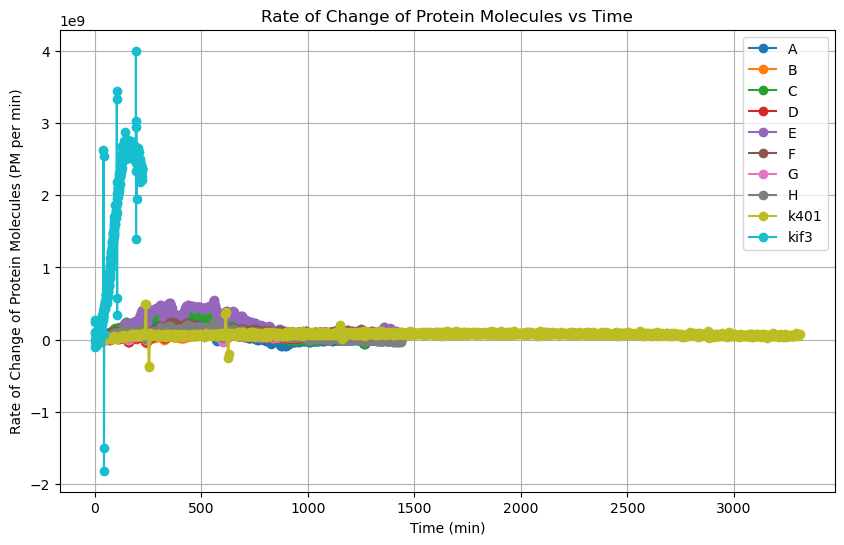

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


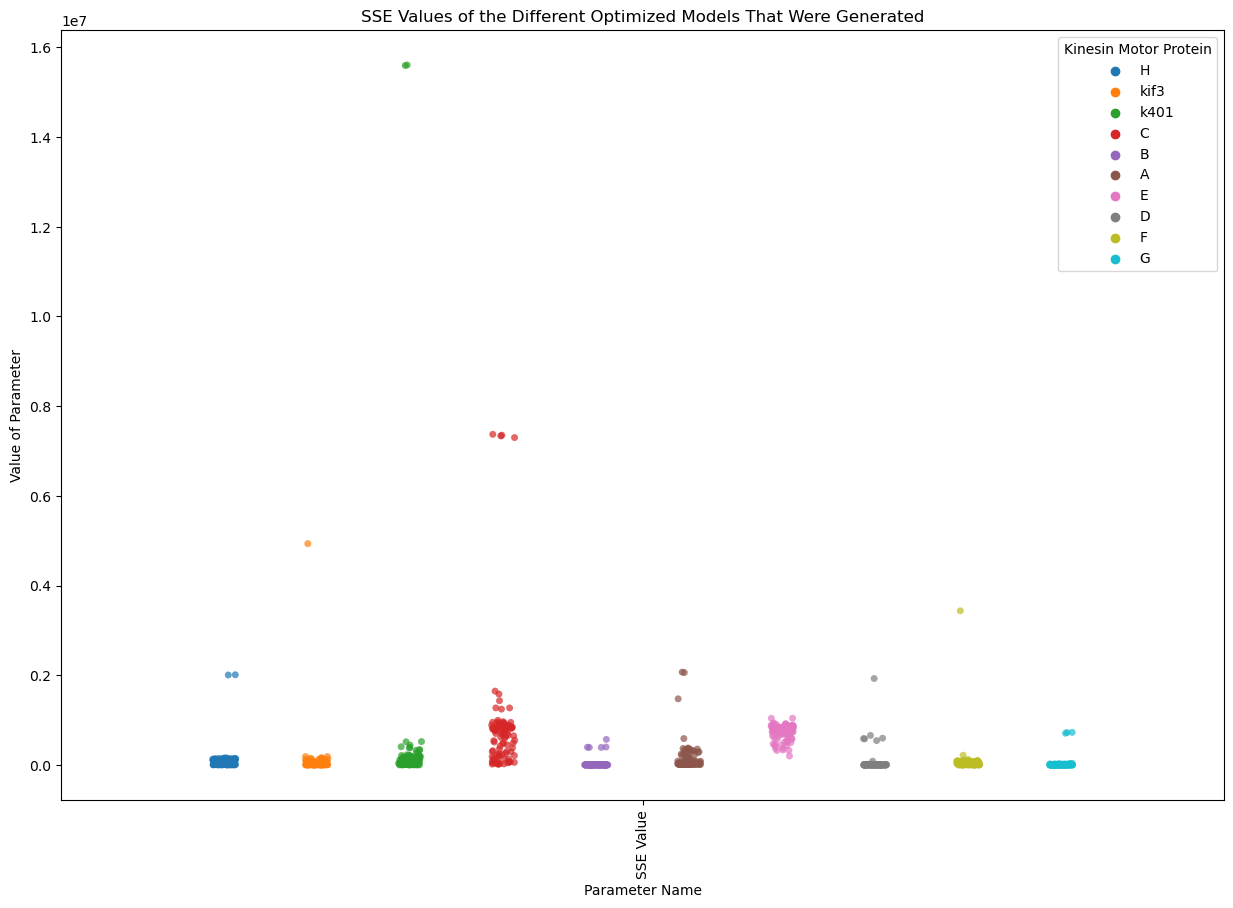

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


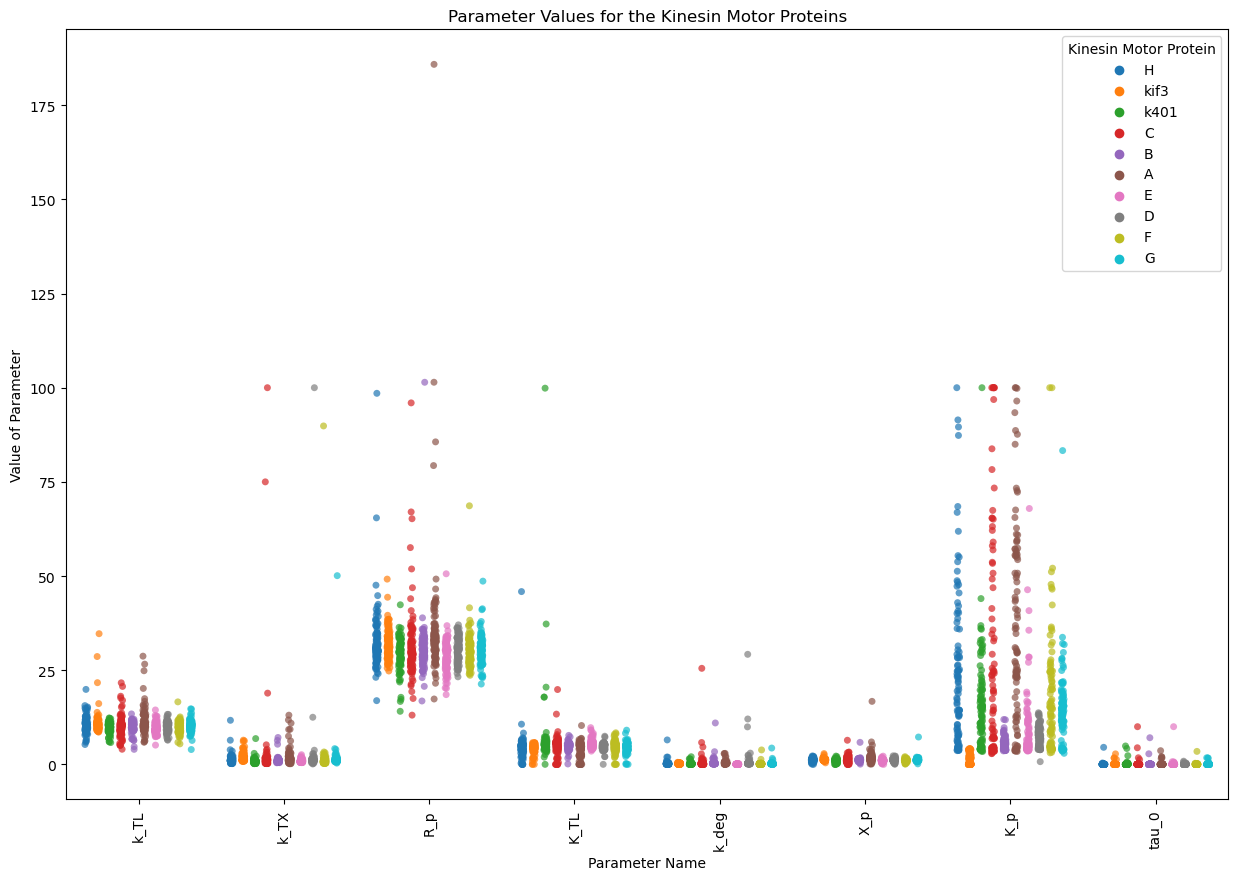

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


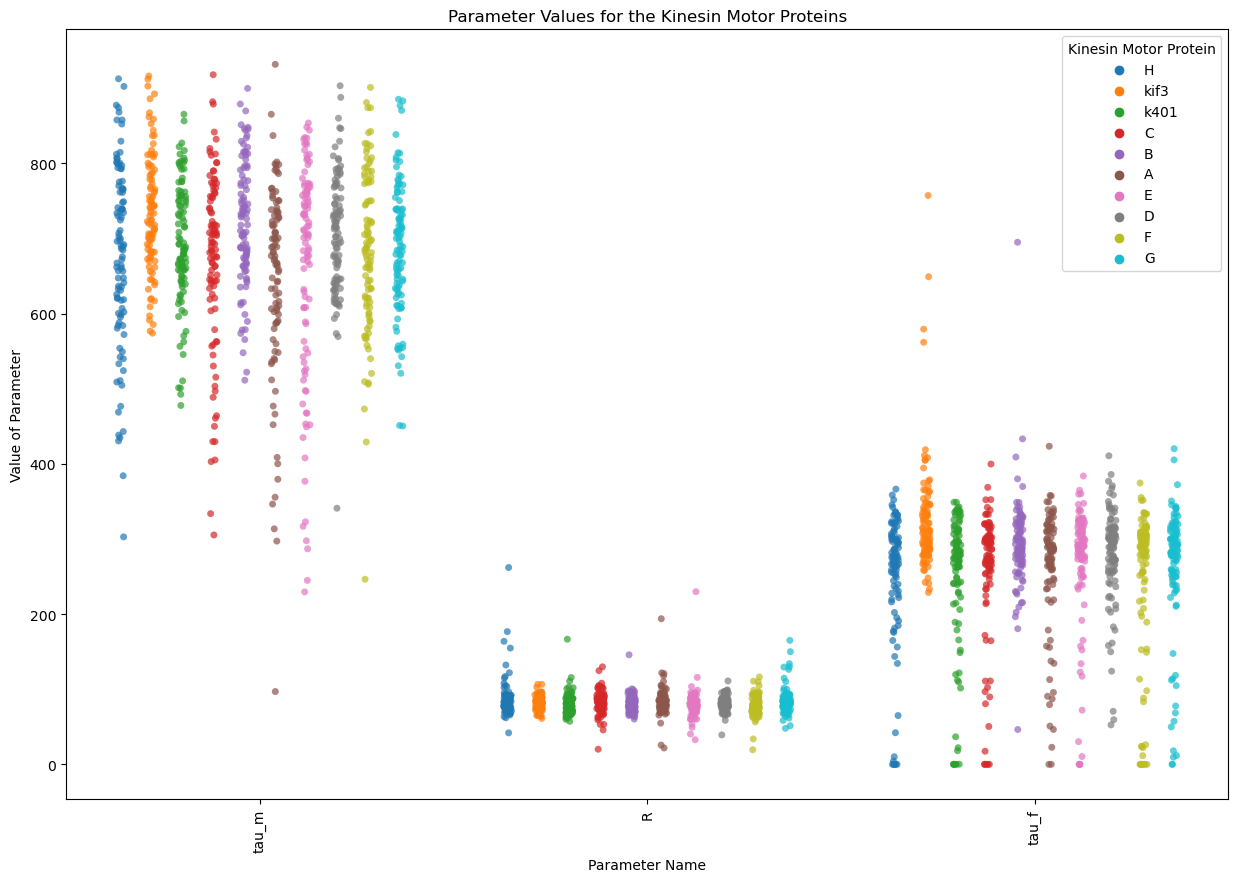

In [12]:
mp.showExperimentalDataTogether()
mp.showTheoreticalDataTogether()